In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
 pd.read_excel('https://cdn.upgrad.com/UpGrad/temp/a625d1ee-b8d7-4edb-bdde-b1d82beaf5b4/Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [3]:
telecom_data = pd.read_csv('https://upgraddocs.s3.us-east-2.amazonaws.com/telecom_churn_data.csv')
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Data cleaning: 

In [4]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(telecom_data.describe())

       mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.5

In [6]:
telecom_data.shape

(99999, 226)

In [7]:
def get_null_percentage(_data):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        return (_data.isnull().sum(axis=0)/_data.shape[0]).sort_values(ascending= False)

In [8]:
null_values_per = get_null_percentage(telecom_data)
null_values_per

count_rech_2g_6             0.748467
date_of_last_rech_data_6    0.748467
count_rech_3g_6             0.748467
av_rech_amt_data_6          0.748467
max_rech_data_6             0.748467
total_rech_data_6           0.748467
arpu_3g_6                   0.748467
arpu_2g_6                   0.748467
night_pck_user_6            0.748467
fb_user_6                   0.748467
arpu_3g_7                   0.744287
count_rech_2g_7             0.744287
fb_user_7                   0.744287
count_rech_3g_7             0.744287
arpu_2g_7                   0.744287
av_rech_amt_data_7          0.744287
max_rech_data_7             0.744287
night_pck_user_7            0.744287
total_rech_data_7           0.744287
date_of_last_rech_data_7    0.744287
night_pck_user_9            0.740777
date_of_last_rech_data_9    0.740777
fb_user_9                   0.740777
arpu_2g_9                   0.740777
max_rech_data_9             0.740777
arpu_3g_9                   0.740777
total_rech_data_9           0.740777
a

In [9]:
telecom_data['good_phase_recharge'] = telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7']

In [10]:
seventy_percentile = int(telecom_data['good_phase_recharge'].quantile(.70))
telecom_data = telecom_data[(telecom_data.good_phase_recharge > seventy_percentile)]
telecom_data.shape

(29979, 227)

In [11]:
null_values_per = get_null_percentage(telecom_data)
null_values_per

count_rech_2g_6             0.620167
total_rech_data_6           0.620167
night_pck_user_6            0.620167
count_rech_3g_6             0.620167
date_of_last_rech_data_6    0.620167
arpu_2g_6                   0.620167
av_rech_amt_data_6          0.620167
fb_user_6                   0.620167
arpu_3g_6                   0.620167
max_rech_data_6             0.620167
arpu_2g_9                   0.618166
arpu_3g_9                   0.618166
date_of_last_rech_data_9    0.618166
total_rech_data_9           0.618166
night_pck_user_9            0.618166
av_rech_amt_data_9          0.618166
fb_user_9                   0.618166
count_rech_3g_9             0.618166
count_rech_2g_9             0.618166
max_rech_data_9             0.618166
total_rech_data_7           0.611328
max_rech_data_7             0.611328
arpu_3g_7                   0.611328
av_rech_amt_data_7          0.611328
arpu_2g_7                   0.611328
count_rech_3g_7             0.611328
night_pck_user_7            0.611328
c

In [12]:
filtered_columns = list(null_values_per[null_values_per < 0.6].index) 

In [13]:
filtered_data = telecom_data[filtered_columns]
filtered_data.head()

,loc_og_t2c_mou_9,loc_ic_t2t_mou_9,std_og_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,loc_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,ic_others_9,...,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,mobile_number
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1580,790,1580,0,0,0,779,0,7000701601
8,0.0,4.03,7.33,13.53,0.0,13.53,60.71,26.13,34.58,0.00,...,186,90,154,30,36,50,0,10,0,7001524846
13,0.0,24.98,230.38,151.51,0.0,213.91,119.69,6.14,108.24,20.31,...,353,110,110,130,130,110,50,0,0,7002191713
16,0.0,50.23,4.46,29.58,0.0,46.24,233.04,26.88,201.49,0.00,...,220,110,110,130,220,100,100,130,220,7000875565
17,0.0,40.91,504.11,1.63,0.0,1.63,45.79,36.41,9.38,0.00,...,335,110,0,30,130,30,0,0,0,7000187447


In [14]:
get_null_percentage(filtered_data)

loc_og_t2c_mou_9        0.056806
loc_ic_t2m_mou_9        0.056806
std_og_t2m_mou_9        0.056806
og_others_9             0.056806
roam_ic_mou_9           0.056806
std_og_mou_9            0.056806
spl_og_mou_9            0.056806
std_og_t2c_mou_9        0.056806
offnet_mou_9            0.056806
std_og_t2f_mou_9        0.056806
isd_og_mou_9            0.056806
roam_og_mou_9           0.056806
std_ic_t2f_mou_9        0.056806
isd_ic_mou_9            0.056806
loc_ic_t2f_mou_9        0.056806
onnet_mou_9             0.056806
loc_og_t2f_mou_9        0.056806
loc_og_mou_9            0.056806
spl_ic_mou_9            0.056806
std_og_t2t_mou_9        0.056806
std_ic_t2m_mou_9        0.056806
std_ic_t2o_mou_9        0.056806
std_ic_mou_9            0.056806
loc_ic_t2t_mou_9        0.056806
loc_og_t2t_mou_9        0.056806
ic_others_9             0.056806
std_ic_t2t_mou_9        0.056806
loc_ic_mou_9            0.056806
loc_og_t2m_mou_9        0.056806
offnet_mou_8            0.031289
          

In [15]:
# filtered_data.apply(pd.value_counts)

filtered_data.describe()

,loc_og_t2c_mou_9,loc_ic_t2t_mou_9,std_og_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,loc_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,ic_others_9,...,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,mobile_number
count,28276.000000,28276.000000,28276.000000,28276.000000,28276.0,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,2.997900e+04
mean,1.509433,65.989633,162.399537,28.814624,0.0,46.553462,259.372681,85.652436,167.025693,1.414604,...,568.333133,171.471130,175.723006,162.929351,157.082158,104.558858,105.303379,95.677774,69.592381,7.001223e+09
std,6.431328,164.249075,393.494099,95.074234,0.0,133.415415,369.914537,233.913274,238.146158,14.542697,...,584.377933,174.762549,181.606909,172.671442,171.665424,142.819031,141.184108,145.319905,128.654161,6.846594e+05
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000e+09
25%,0.000000,7.580000,0.000000,0.050000,0.0,1.610000,40.040000,5.890000,23.337500,0.000000,...,260.000000,110.000000,110.000000,67.000000,50.000000,30.000000,27.000000,0.000000,0.000000,7.000641e+09
50%,0.000000,27.480000,6.010000,5.660000,0.0,12.230000,146.725000,28.460000,90.025000,0.000000,...,481.000000,120.000000,128.000000,130.000000,130.000000,110.000000,98.000000,50.000000,27.000000,7.001232e+09
75%,0.000000,69.710000,123.592500,24.415000,0.0,42.360000,344.172500,83.382500,218.810000,0.030000,...,750.000000,200.000000,200.000000,198.000000,179.000000,120.000000,130.000000,130.000000,130.000000,7.001814e+09
max,274.890000,7565.890000,7244.160000,5689.760000,0.0,5956.660000,11099.260000,10389.240000,4429.880000,919.630000,...,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,4010.000000,4010.000000,4449.000000,3399.000000,7.002411e+09


In [16]:
# std_og_t2c_mou_6
# std_ic_t2o_mou_6
# std_ic_t2o_mou_8
# std_og_t2c_mou_8
# std_og_t2c_mou_9
# std_ic_t2o_mou_9

# ===> Drop these columns as there is no change in the data overall
dropping_columns = [
    'std_og_t2c_mou_6', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_8',
    'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_9',
    'std_og_t2c_mou_7', 'std_ic_t2o_mou_7', 'loc_og_t2o_mou', 'std_og_t2o_mou',
    'loc_ic_t2o_mou', 'circle_id', 'mobile_number'
]
filtered_data = filtered_data.drop(columns=dropping_columns, axis=1)

In [17]:
filtered_data.describe()

,loc_og_t2c_mou_9,loc_ic_t2t_mou_9,std_og_t2t_mou_9,std_ic_t2m_mou_9,std_ic_mou_9,loc_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,ic_others_9,std_ic_t2t_mou_9,...,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9
count,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,1.509433,65.989633,162.399537,28.814624,46.553462,259.372681,85.652436,167.025693,1.414604,14.846225,...,613.908403,568.333133,171.471130,175.723006,162.929351,157.082158,104.558858,105.303379,95.677774,69.592381
std,6.431328,164.249075,393.494099,95.074234,133.415415,369.914537,233.913274,238.146158,14.542697,71.632225,...,602.047678,584.377933,174.762549,181.606909,172.671442,171.665424,142.819031,141.184108,145.319905,128.654161
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.580000,0.000000,0.050000,1.610000,40.040000,5.890000,23.337500,0.000000,0.000000,...,309.000000,260.000000,110.000000,110.000000,67.000000,50.000000,30.000000,27.000000,0.000000,0.000000
50%,0.000000,27.480000,6.010000,5.660000,12.230000,146.725000,28.460000,90.025000,0.000000,0.550000,...,520.000000,481.000000,120.000000,128.000000,130.000000,130.000000,110.000000,98.000000,50.000000,27.000000
75%,0.000000,69.710000,123.592500,24.415000,42.360000,344.172500,83.382500,218.810000,0.030000,8.410000,...,790.000000,750.000000,200.000000,200.000000,198.000000,179.000000,120.000000,130.000000,130.000000,130.000000
max,274.890000,7565.890000,7244.160000,5689.760000,5956.660000,11099.260000,10389.240000,4429.880000,919.630000,3819.830000,...,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,4010.000000,4010.000000,4449.000000,3399.000000


In [18]:
filtered_data.roam_og_mou_9.fillna(0, inplace=True)

In [19]:
def is_churned(_x):
    if ((_x.total_ic_mou_9 == 0) & (_x.total_og_mou_9 == 0) & (_x.vol_2g_mb_9 == 0) & (_x.vol_3g_mb_9 == 0)):
        return 1
    else:
        return 0
filtered_data['churn'] = filtered_data.apply(is_churned, axis=1)

In [20]:
filtered_data.churn.value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [21]:
filtered_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 175 columns):
loc_og_t2c_mou_9        float64
loc_ic_t2t_mou_9        float64
std_og_t2t_mou_9        float64
std_ic_t2m_mou_9        float64
std_ic_mou_9            float64
loc_og_mou_9            float64
loc_og_t2t_mou_9        float64
loc_og_t2m_mou_9        float64
ic_others_9             float64
std_ic_t2t_mou_9        float64
loc_ic_mou_9            float64
spl_ic_mou_9            float64
loc_og_t2f_mou_9        float64
loc_ic_t2m_mou_9        float64
loc_ic_t2f_mou_9        float64
isd_ic_mou_9            float64
std_ic_t2f_mou_9        float64
roam_og_mou_9           float64
isd_og_mou_9            float64
onnet_mou_9             float64
std_og_t2f_mou_9        float64
offnet_mou_9            float64
spl_og_mou_9            float64
std_og_mou_9            float64
roam_ic_mou_9           float64
og_others_9             float64
std_og_t2m_mou_9        float64
loc_og_t2c_mou_8        fl

In [22]:
# ===> Drop columns 'last_date_of_month_6', 'last_date_of_month_7' as it's same across all columns
filtered_data.drop(columns=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'], axis=1, inplace=True)

In [23]:
def convert_to_datetime(_x, _columns):
    _x[_columns] = _x[_columns].apply(pd.to_datetime, format='%m/%d/%Y')
    return _x


_columns = [
     'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_9', 'date_of_last_rech_8'
]
filtered_data[_columns] = convert_to_datetime(filtered_data[_columns], _columns)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [24]:
filtered_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 171 columns):
loc_og_t2c_mou_9       float64
loc_ic_t2t_mou_9       float64
std_og_t2t_mou_9       float64
std_ic_t2m_mou_9       float64
std_ic_mou_9           float64
loc_og_mou_9           float64
loc_og_t2t_mou_9       float64
loc_og_t2m_mou_9       float64
ic_others_9            float64
std_ic_t2t_mou_9       float64
loc_ic_mou_9           float64
spl_ic_mou_9           float64
loc_og_t2f_mou_9       float64
loc_ic_t2m_mou_9       float64
loc_ic_t2f_mou_9       float64
isd_ic_mou_9           float64
std_ic_t2f_mou_9       float64
roam_og_mou_9          float64
isd_og_mou_9           float64
onnet_mou_9            float64
std_og_t2f_mou_9       float64
offnet_mou_9           float64
spl_og_mou_9           float64
std_og_mou_9           float64
roam_ic_mou_9          float64
og_others_9            float64
std_og_t2m_mou_9       float64
loc_og_t2c_mou_8       float64
std_og_mou_8          

In [25]:
without9_columns = filtered_data.columns.drop(list(filtered_data.filter(regex='_9')))
filtered_data = filtered_data[without9_columns] 
filtered_columns = filtered_data.columns

In [26]:
filtered_data[(filtered_data.arpu_7 <= 0) & (filtered_data.arpu_8 <= 0)].churn.value_counts() 

1    107
0     10
Name: churn, dtype: int64

##### Correlation: 

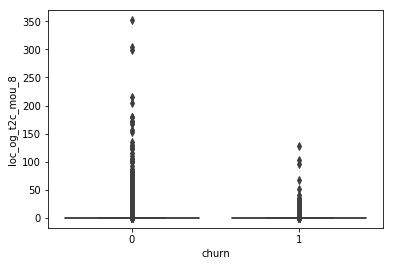

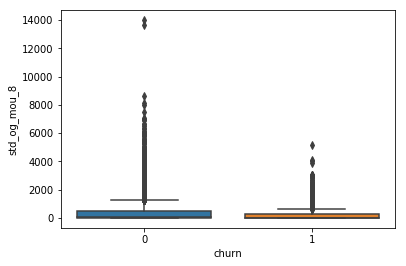

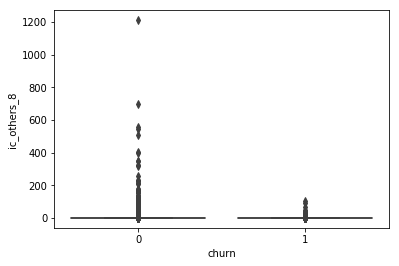

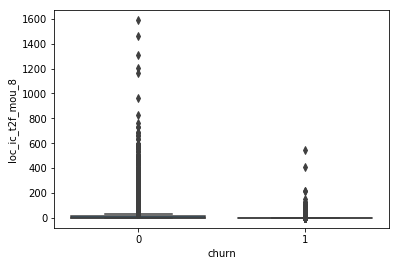

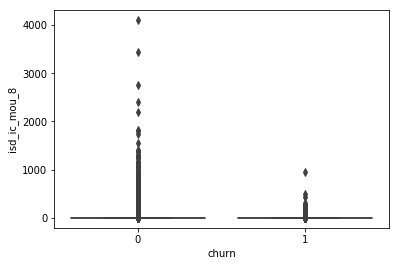

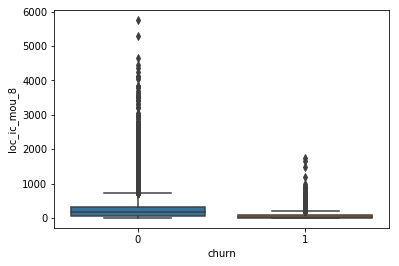

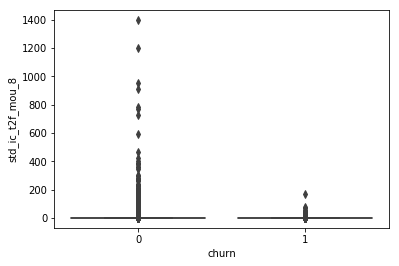

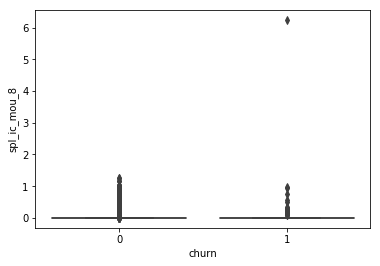

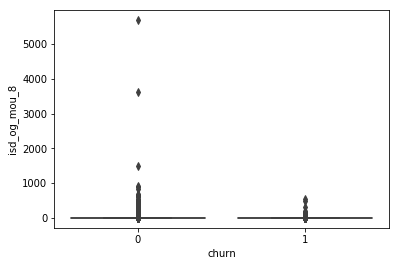

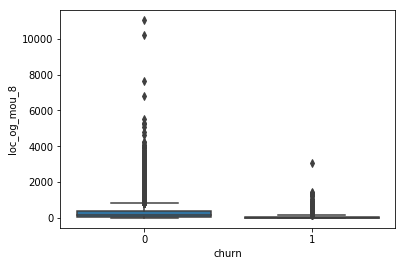

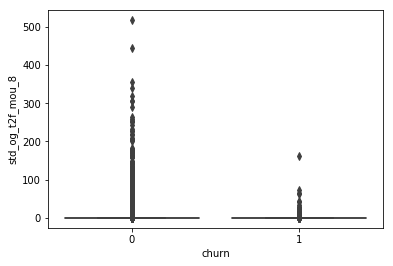

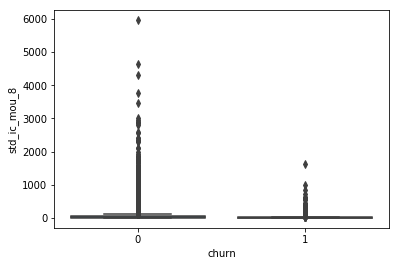

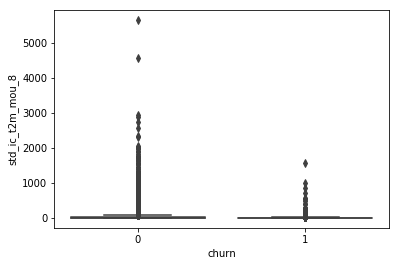

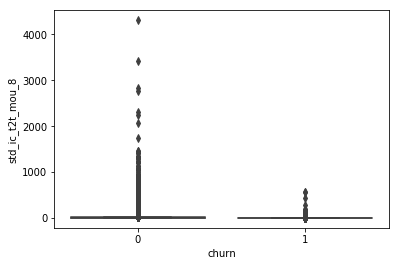

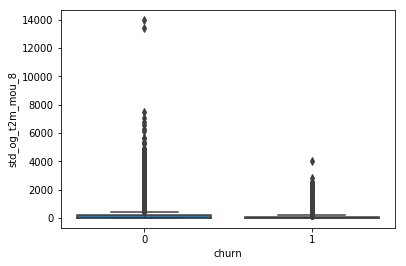

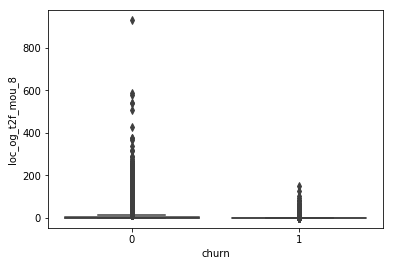

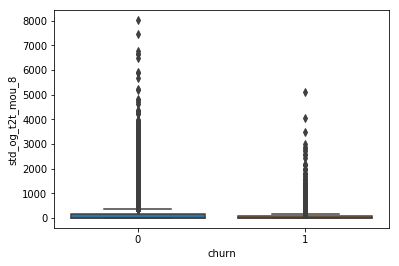

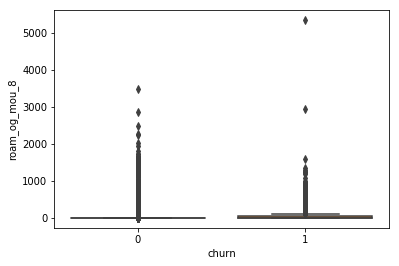

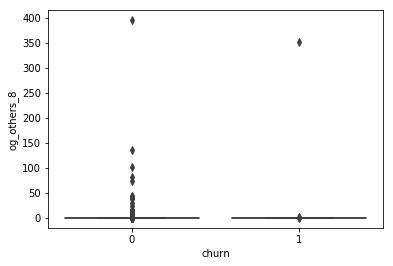

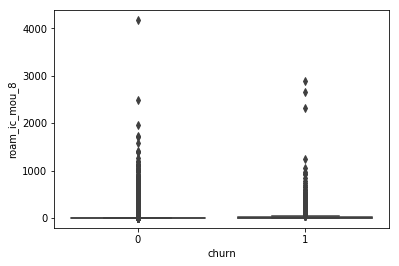

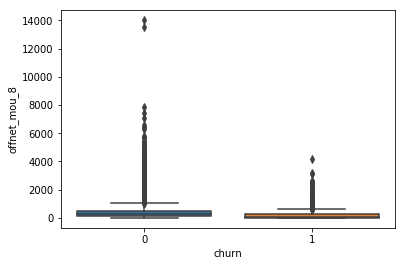

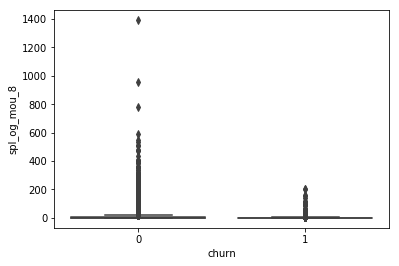

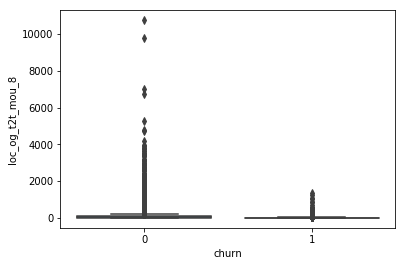

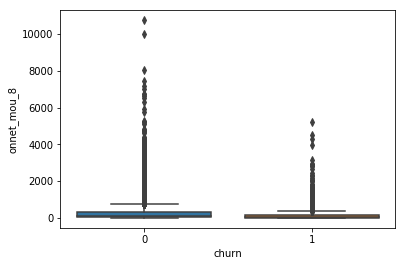

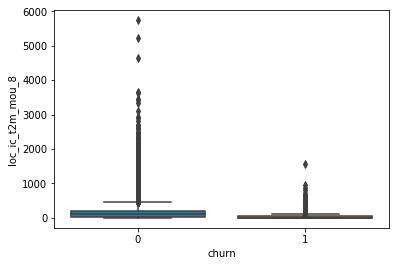

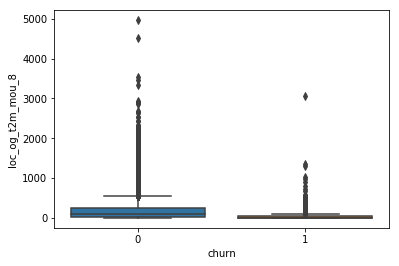

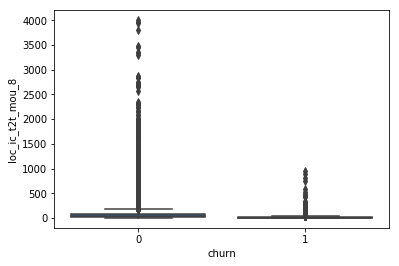

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

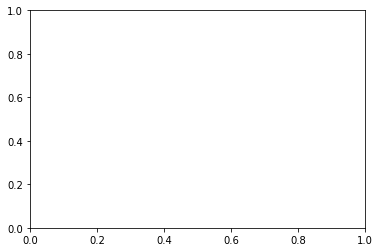

In [27]:
for _column in filtered_columns:
    plt.figure()
    sns.boxplot(y=_column, x='churn', data=filtered_data, orient='v')
    plt.show()

In [28]:
filtered_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 130 columns):
loc_og_t2c_mou_8       float64
std_og_mou_8           float64
ic_others_8            float64
loc_ic_t2f_mou_8       float64
isd_ic_mou_8           float64
loc_ic_mou_8           float64
std_ic_t2f_mou_8       float64
spl_ic_mou_8           float64
isd_og_mou_8           float64
loc_og_mou_8           float64
std_og_t2f_mou_8       float64
std_ic_mou_8           float64
std_ic_t2m_mou_8       float64
std_ic_t2t_mou_8       float64
std_og_t2m_mou_8       float64
loc_og_t2f_mou_8       float64
std_og_t2t_mou_8       float64
roam_og_mou_8          float64
og_others_8            float64
roam_ic_mou_8          float64
offnet_mou_8           float64
spl_og_mou_8           float64
loc_og_t2t_mou_8       float64
onnet_mou_8            float64
loc_ic_t2m_mou_8       float64
loc_og_t2m_mou_8       float64
loc_ic_t2t_mou_8       float64
date_of_last_rech_8    datetime64[ns]
std_ic_t2f_mou_

#### Feature engineering: 

In [29]:
filtered_data.date_of_last_rech_7.dtype

dtype('<M8[ns]')

In [30]:
def filter_date_and_day(_data):
    for _column in _data.select_dtypes(include=['datetime64']).columns:
        _data[_column + '_year'] = _data[_column].dt.year 
        _data[_column + '_month'] = _data[_column].dt.month 
        _data[_column + '_day'] = _data[_column].dt.day
        _data.drop(columns=[_column], axis=1, inplace=True)
    return _data

filtered_data = filter_date_and_day(filtered_data)
filtered_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 136 columns):
loc_og_t2c_mou_8             float64
std_og_mou_8                 float64
ic_others_8                  float64
loc_ic_t2f_mou_8             float64
isd_ic_mou_8                 float64
loc_ic_mou_8                 float64
std_ic_t2f_mou_8             float64
spl_ic_mou_8                 float64
isd_og_mou_8                 float64
loc_og_mou_8                 float64
std_og_t2f_mou_8             float64
std_ic_mou_8                 float64
std_ic_t2m_mou_8             float64
std_ic_t2t_mou_8             float64
std_og_t2m_mou_8             float64
loc_og_t2f_mou_8             float64
std_og_t2t_mou_8             float64
roam_og_mou_8                float64
og_others_8                  float64
roam_ic_mou_8                float64
offnet_mou_8                 float64
spl_og_mou_8                 float64
loc_og_t2t_mou_8             float64
onnet_mou_8                  float64
lo

In [31]:
filtered_data.select_dtypes(include=['datetime64']).columns

Index([], dtype='object')

In [32]:
# remove rows whose rows has null values more than 80
filtered_data = filtered_data[~(filtered_data.apply(lambda x: sum(x.isnull().values), axis = 1)> 80)]

In [33]:
filtered_data.shape

(29857, 136)

In [34]:
from fancyimpute import KNN

Using TensorFlow backend.


In [35]:
filtered_data_knn = KNN(k=3).fit_transform(filtered_data)
filtered_data.isnull().sum()

Imputing row 1/29857 with 0 missing, elapsed time: 1114.395
Imputing row 101/29857 with 27 missing, elapsed time: 1118.947
Imputing row 201/29857 with 0 missing, elapsed time: 1119.058
Imputing row 301/29857 with 0 missing, elapsed time: 1119.102
Imputing row 401/29857 with 0 missing, elapsed time: 1119.118
Imputing row 501/29857 with 0 missing, elapsed time: 1119.170
Imputing row 601/29857 with 0 missing, elapsed time: 1119.214
Imputing row 701/29857 with 0 missing, elapsed time: 1119.226
Imputing row 801/29857 with 0 missing, elapsed time: 1119.234
Imputing row 901/29857 with 0 missing, elapsed time: 1119.266
Imputing row 1001/29857 with 0 missing, elapsed time: 1119.279
Imputing row 1101/29857 with 0 missing, elapsed time: 1119.333
Imputing row 1201/29857 with 0 missing, elapsed time: 1119.375
Imputing row 1301/29857 with 0 missing, elapsed time: 1119.399
Imputing row 1401/29857 with 0 missing, elapsed time: 1119.415
Imputing row 1501/29857 with 0 missing, elapsed time: 1119.458
Imp

Imputing row 13201/29857 with 0 missing, elapsed time: 1128.834
Imputing row 13301/29857 with 0 missing, elapsed time: 1128.880
Imputing row 13401/29857 with 0 missing, elapsed time: 1128.892
Imputing row 13501/29857 with 0 missing, elapsed time: 1128.912
Imputing row 13601/29857 with 0 missing, elapsed time: 1128.934
Imputing row 13701/29857 with 0 missing, elapsed time: 1128.961
Imputing row 13801/29857 with 27 missing, elapsed time: 1128.977
Imputing row 13901/29857 with 0 missing, elapsed time: 1129.020
Imputing row 14001/29857 with 0 missing, elapsed time: 1129.034
Imputing row 14101/29857 with 0 missing, elapsed time: 1129.079
Imputing row 14201/29857 with 0 missing, elapsed time: 1129.089
Imputing row 14301/29857 with 0 missing, elapsed time: 1129.139
Imputing row 14401/29857 with 0 missing, elapsed time: 1129.163
Imputing row 14501/29857 with 0 missing, elapsed time: 1129.230
Imputing row 14601/29857 with 0 missing, elapsed time: 1129.269
Imputing row 14701/29857 with 0 missing

Imputing row 26601/29857 with 0 missing, elapsed time: 1138.808
Imputing row 26701/29857 with 0 missing, elapsed time: 1138.879
Imputing row 26801/29857 with 0 missing, elapsed time: 1138.916
Imputing row 26901/29857 with 0 missing, elapsed time: 1138.946
Imputing row 27001/29857 with 0 missing, elapsed time: 1138.962
Imputing row 27101/29857 with 0 missing, elapsed time: 1138.995
Imputing row 27201/29857 with 0 missing, elapsed time: 1139.025
Imputing row 27301/29857 with 0 missing, elapsed time: 1139.056
Imputing row 27401/29857 with 0 missing, elapsed time: 1139.066
Imputing row 27501/29857 with 0 missing, elapsed time: 1139.102
Imputing row 27601/29857 with 0 missing, elapsed time: 1139.155
Imputing row 27701/29857 with 0 missing, elapsed time: 1139.189
Imputing row 27801/29857 with 0 missing, elapsed time: 1139.248
Imputing row 27901/29857 with 0 missing, elapsed time: 1139.300
Imputing row 28001/29857 with 0 missing, elapsed time: 1139.340
Imputing row 28101/29857 with 0 missing,

loc_og_t2c_mou_8             816
std_og_mou_8                 816
ic_others_8                  816
loc_ic_t2f_mou_8             816
isd_ic_mou_8                 816
loc_ic_mou_8                 816
std_ic_t2f_mou_8             816
spl_ic_mou_8                 816
isd_og_mou_8                 816
loc_og_mou_8                 816
std_og_t2f_mou_8             816
std_ic_mou_8                 816
std_ic_t2m_mou_8             816
std_ic_t2t_mou_8             816
std_og_t2m_mou_8             816
loc_og_t2f_mou_8             816
std_og_t2t_mou_8             816
roam_og_mou_8                816
og_others_8                  816
roam_ic_mou_8                816
offnet_mou_8                 816
spl_og_mou_8                 816
loc_og_t2t_mou_8             816
onnet_mou_8                  816
loc_ic_t2m_mou_8             816
loc_og_t2m_mou_8             816
loc_ic_t2t_mou_8             816
std_ic_t2f_mou_6             194
loc_ic_t2m_mou_6             194
std_og_t2f_mou_6             194
          

In [39]:
len(filtered_data_knn[0])

136

In [44]:
df_filtere_data_knn = pd.DataFrame(filtered_data_knn)
df_filtere_data_knn.columns = list(filtered_data)
df_filtere_data_knn.isnull().sum()

loc_og_t2c_mou_8             0
std_og_mou_8                 0
ic_others_8                  0
loc_ic_t2f_mou_8             0
isd_ic_mou_8                 0
loc_ic_mou_8                 0
std_ic_t2f_mou_8             0
spl_ic_mou_8                 0
isd_og_mou_8                 0
loc_og_mou_8                 0
std_og_t2f_mou_8             0
std_ic_mou_8                 0
std_ic_t2m_mou_8             0
std_ic_t2t_mou_8             0
std_og_t2m_mou_8             0
loc_og_t2f_mou_8             0
std_og_t2t_mou_8             0
roam_og_mou_8                0
og_others_8                  0
roam_ic_mou_8                0
offnet_mou_8                 0
spl_og_mou_8                 0
loc_og_t2t_mou_8             0
onnet_mou_8                  0
loc_ic_t2m_mou_8             0
loc_og_t2m_mou_8             0
loc_ic_t2t_mou_8             0
std_ic_t2f_mou_6             0
loc_ic_t2m_mou_6             0
std_og_t2f_mou_6             0
                            ..
vol_2g_mb_8                  0
vol_2g_m

In [45]:
filtered_data = df_filtere_data_knn

In [46]:
filtered_data.head()

,loc_og_t2c_mou_8,std_og_mou_8,ic_others_8,loc_ic_t2f_mou_8,isd_ic_mou_8,loc_ic_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_og_mou_8,loc_og_mou_8,...,churn,date_of_last_rech_8_year,date_of_last_rech_8_month,date_of_last_rech_8_day,date_of_last_rech_7_year,date_of_last_rech_7_month,date_of_last_rech_7_day,date_of_last_rech_6_year,date_of_last_rech_6_month,date_of_last_rech_6_day
0,0.00,77.84,15.14,39.53,31.59,188.04,22.21,0.0,10.01,255.79,...,1.0,2014.0,8.0,26.0,2014.0,7.0,25.0,2014.0,6.0,27.0
1,7.15,98.28,0.00,0.00,0.00,15.79,0.00,0.0,0.00,63.04,...,0.0,2014.0,8.0,30.0,2014.0,7.0,31.0,2014.0,6.0,25.0
2,0.49,655.18,21.44,7.49,393.39,255.26,1.91,0.0,1.29,353.99,...,0.0,2014.0,8.0,30.0,2014.0,7.0,22.0,2014.0,6.0,20.0
3,0.00,21.53,0.00,32.71,0.23,211.78,2.18,0.0,0.00,205.93,...,0.0,2014.0,8.0,14.0,2014.0,7.0,31.0,2014.0,6.0,30.0
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,2014.0,8.0,25.0,2014.0,7.0,30.0,2014.0,6.0,30.0


#### Standardise the data: 

In [47]:
filtered_data.shape

(29857, 136)

In [48]:
# filtered_data.dropna(inplace=True)

In [49]:
filtered_data.shape

(29857, 136)

In [50]:
qar = filtered_data['loc_og_t2m_mou_6'].quantile(1.0)
filtered_data[ filtered_data['onnet_mou_8'] < qar].shape

(29834, 136)

In [51]:
filtered_data.shape

(29857, 136)

In [52]:
# filtered_data = dup

In [53]:
dup = filtered_data

In [54]:
Q1 = filtered_data.quantile(0.05)
Q3 = filtered_data.quantile(0.99)
IQR = Q3 - Q1

filtered_data = filtered_data[~((filtered_data < (Q1 - 1.5 * IQR)) |(filtered_data > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered_data.shape

(26847, 136)

In [55]:
X = filtered_data.drop(columns=['churn'], axis=1)
Y = filtered_data[['churn']]

scaler = StandardScaler()
_columns = X.columns
X[_columns] = scaler.fit_transform(X)
X.head()


,loc_og_t2c_mou_8,std_og_mou_8,ic_others_8,loc_ic_t2f_mou_8,isd_ic_mou_8,loc_ic_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_og_mou_8,loc_og_mou_8,...,last_day_rch_amt_8,date_of_last_rech_8_year,date_of_last_rech_8_month,date_of_last_rech_8_day,date_of_last_rech_7_year,date_of_last_rech_7_month,date_of_last_rech_7_day,date_of_last_rech_6_year,date_of_last_rech_6_month,date_of_last_rech_6_day
0,-0.302195,-0.483481,4.626118,0.789671,0.718687,-0.141986,2.756009,-0.254619,2.982821,0.005506,...,5.863533,0.0,0.0,-0.175661,0.0,0.0,-0.608147,0.0,0.0,0.028283
1,1.138910,-0.447826,-0.225543,-0.406345,-0.214124,-0.811209,-0.248040,-0.254619,-0.110571,-0.609965,...,-0.699404,0.0,0.0,0.613040,0.0,0.0,0.805989,0.0,0.0,-0.453830
3,-0.302195,-0.581708,-0.225543,0.583326,-0.207333,-0.049751,0.046820,-0.254619,-0.110571,-0.153702,...,0.324722,0.0,0.0,-2.541764,0.0,0.0,0.805989,0.0,0.0,0.751453
4,-0.302195,-0.619264,-0.225543,-0.406345,-0.214124,-0.872556,-0.248040,-0.254619,-0.110571,-0.811259,...,-0.784747,0.0,0.0,-0.372836,0.0,0.0,0.570299,0.0,0.0,0.751453
5,-0.302195,1.018349,-0.225543,-0.091986,-0.214124,-0.254384,-0.248040,-0.254619,-0.110571,-0.396985,...,-0.358028,0.0,0.0,0.810215,0.0,0.0,0.805989,0.0,0.0,0.751453


In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [57]:
x_train.head()

,loc_og_t2c_mou_8,std_og_mou_8,ic_others_8,loc_ic_t2f_mou_8,isd_ic_mou_8,loc_ic_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_og_mou_8,loc_og_mou_8,...,last_day_rch_amt_8,date_of_last_rech_8_year,date_of_last_rech_8_month,date_of_last_rech_8_day,date_of_last_rech_7_year,date_of_last_rech_7_month,date_of_last_rech_7_day,date_of_last_rech_6_year,date_of_last_rech_6_month,date_of_last_rech_6_day
7482,-0.302195,2.478471,-0.225543,-0.406345,-0.214124,-0.499268,-0.24804,-0.254619,-0.110571,-0.297839,...,0.444203,0.0,0.0,0.415865,0.0,0.0,0.805989,0.0,0.0,0.269340
9414,-0.068393,1.275158,5.183707,-0.326772,4.107697,-0.440679,-0.24804,-0.254619,-0.110571,-0.580908,...,0.324722,0.0,0.0,0.613040,0.0,0.0,0.334610,0.0,0.0,0.751453
9527,-0.302195,-0.434132,-0.225543,-0.370643,-0.214124,1.344759,-0.24804,-0.254619,-0.110571,1.807504,...,0.922128,0.0,0.0,0.415865,0.0,0.0,0.805989,0.0,0.0,0.028283
29803,-0.302195,-0.619264,-0.193498,-0.012111,-0.182824,0.484073,-0.24804,-0.254619,-0.110571,0.697293,...,3.132532,0.0,0.0,-2.541764,0.0,0.0,0.570299,0.0,0.0,-3.105452
15607,-0.302195,1.180751,-0.180680,-0.396361,-0.214124,-0.558089,-0.24804,-0.254619,-0.110571,-0.721596,...,0.324722,0.0,0.0,-1.555888,0.0,0.0,0.098921,0.0,0.0,-0.453830


In [58]:
x_train.shape

(18792, 135)

In [59]:
pca = PCA(random_state=100, svd_solver='randomized')
pca.fit_transform(x_train)

array([[-2.55241693e+00,  6.39949842e+00,  5.30533762e-02, ...,
        -6.72979597e-18,  2.00714394e-16,  1.34276737e-16],
       [-2.19683688e+00,  1.32400704e+00, -1.72079034e-01, ...,
        -3.23515128e-18, -1.24839567e-16, -1.49605218e-16],
       [ 2.28989001e+00,  1.20669638e-01,  5.67679136e-01, ...,
         2.67468634e-17, -8.47654896e-17, -1.39244183e-16],
       ...,
       [-8.44942418e-01, -4.38905596e+00,  3.69556809e-01, ...,
         1.47737178e-17, -8.53362507e-18,  6.85086404e-18],
       [ 2.41026480e+00, -4.14236308e+00, -1.23020943e-01, ...,
         1.00512246e-18, -1.95405290e-17, -7.17041479e-18],
       [-1.95599695e+00, -2.48648620e-01, -1.57633806e+00, ...,
        -6.36324749e-18,  9.45325955e-18,  2.11579943e-19]])

In [60]:
pca.components_.round(4)

array([[ 4.500e-03, -3.510e-02,  2.660e-02, ..., -0.000e+00, -0.000e+00,
        -1.270e-02],
       [ 3.070e-02,  2.354e-01,  8.500e-03, ...,  0.000e+00,  0.000e+00,
         8.010e-02],
       [ 6.800e-03,  3.890e-02, -3.000e-04, ..., -0.000e+00, -0.000e+00,
        -7.860e-02],
       ...,
       [-0.000e+00, -0.000e+00,  0.000e+00, ..., -0.000e+00, -0.000e+00,
        -0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  1.000e+00,  0.000e+00,
         0.000e+00]])

In [61]:
colnames = list(x_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,Feature
0,0.004533,0.030747,loc_og_t2c_mou_8
1,-0.035142,0.235358,std_og_mou_8
2,0.026628,0.008528,ic_others_8
3,0.106856,-0.044750,loc_ic_t2f_mou_8
4,0.027057,-0.002608,isd_ic_mou_8
5,0.209351,-0.036964,loc_ic_mou_8
6,0.057582,-0.022405,std_ic_t2f_mou_8
7,-0.018710,0.026657,spl_ic_mou_8
8,0.014197,-0.009716,isd_og_mou_8
9,0.199994,0.011998,loc_og_mou_8


In [62]:
pca.explained_variance_ratio_.round(4)

array([0.1112, 0.0945, 0.0567, 0.0457, 0.0378, 0.0375, 0.0298, 0.0272,
       0.0246, 0.0235, 0.0222, 0.0213, 0.0191, 0.0183, 0.0169, 0.0162,
       0.0147, 0.0139, 0.0129, 0.0121, 0.0115, 0.0114, 0.0111, 0.0103,
       0.0095, 0.0092, 0.0087, 0.0082, 0.0081, 0.0079, 0.0077, 0.0075,
       0.0072, 0.0072, 0.0069, 0.0069, 0.0066, 0.0064, 0.0064, 0.0062,
       0.0062, 0.006 , 0.0059, 0.0057, 0.0057, 0.0054, 0.0053, 0.0052,
       0.0049, 0.0047, 0.0047, 0.0044, 0.0042, 0.0041, 0.004 , 0.004 ,
       0.0039, 0.0038, 0.0037, 0.0036, 0.0035, 0.0034, 0.0034, 0.0033,
       0.0032, 0.0032, 0.0031, 0.003 , 0.0029, 0.0028, 0.0027, 0.0027,
       0.0026, 0.0026, 0.0025, 0.0025, 0.0023, 0.0022, 0.0021, 0.002 ,
       0.002 , 0.002 , 0.002 , 0.0019, 0.0018, 0.0018, 0.0017, 0.0016,
       0.0016, 0.0015, 0.0013, 0.0013, 0.0012, 0.001 , 0.0009, 0.0009,
       0.0007, 0.0007, 0.0006, 0.0004, 0.0004, 0.0002, 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
      

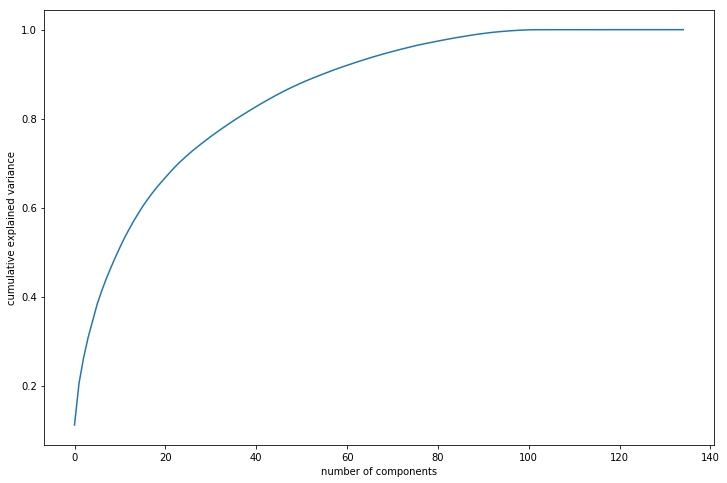

In [63]:
fig = plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### we try to make 85 components to describe 95% of the components

In [64]:
pca_final = IncrementalPCA(n_components=85)
df_train_pca = pca_final.fit_transform(x_train)
df_train_pca.shape

(18792, 85)

#### Check correlation: 

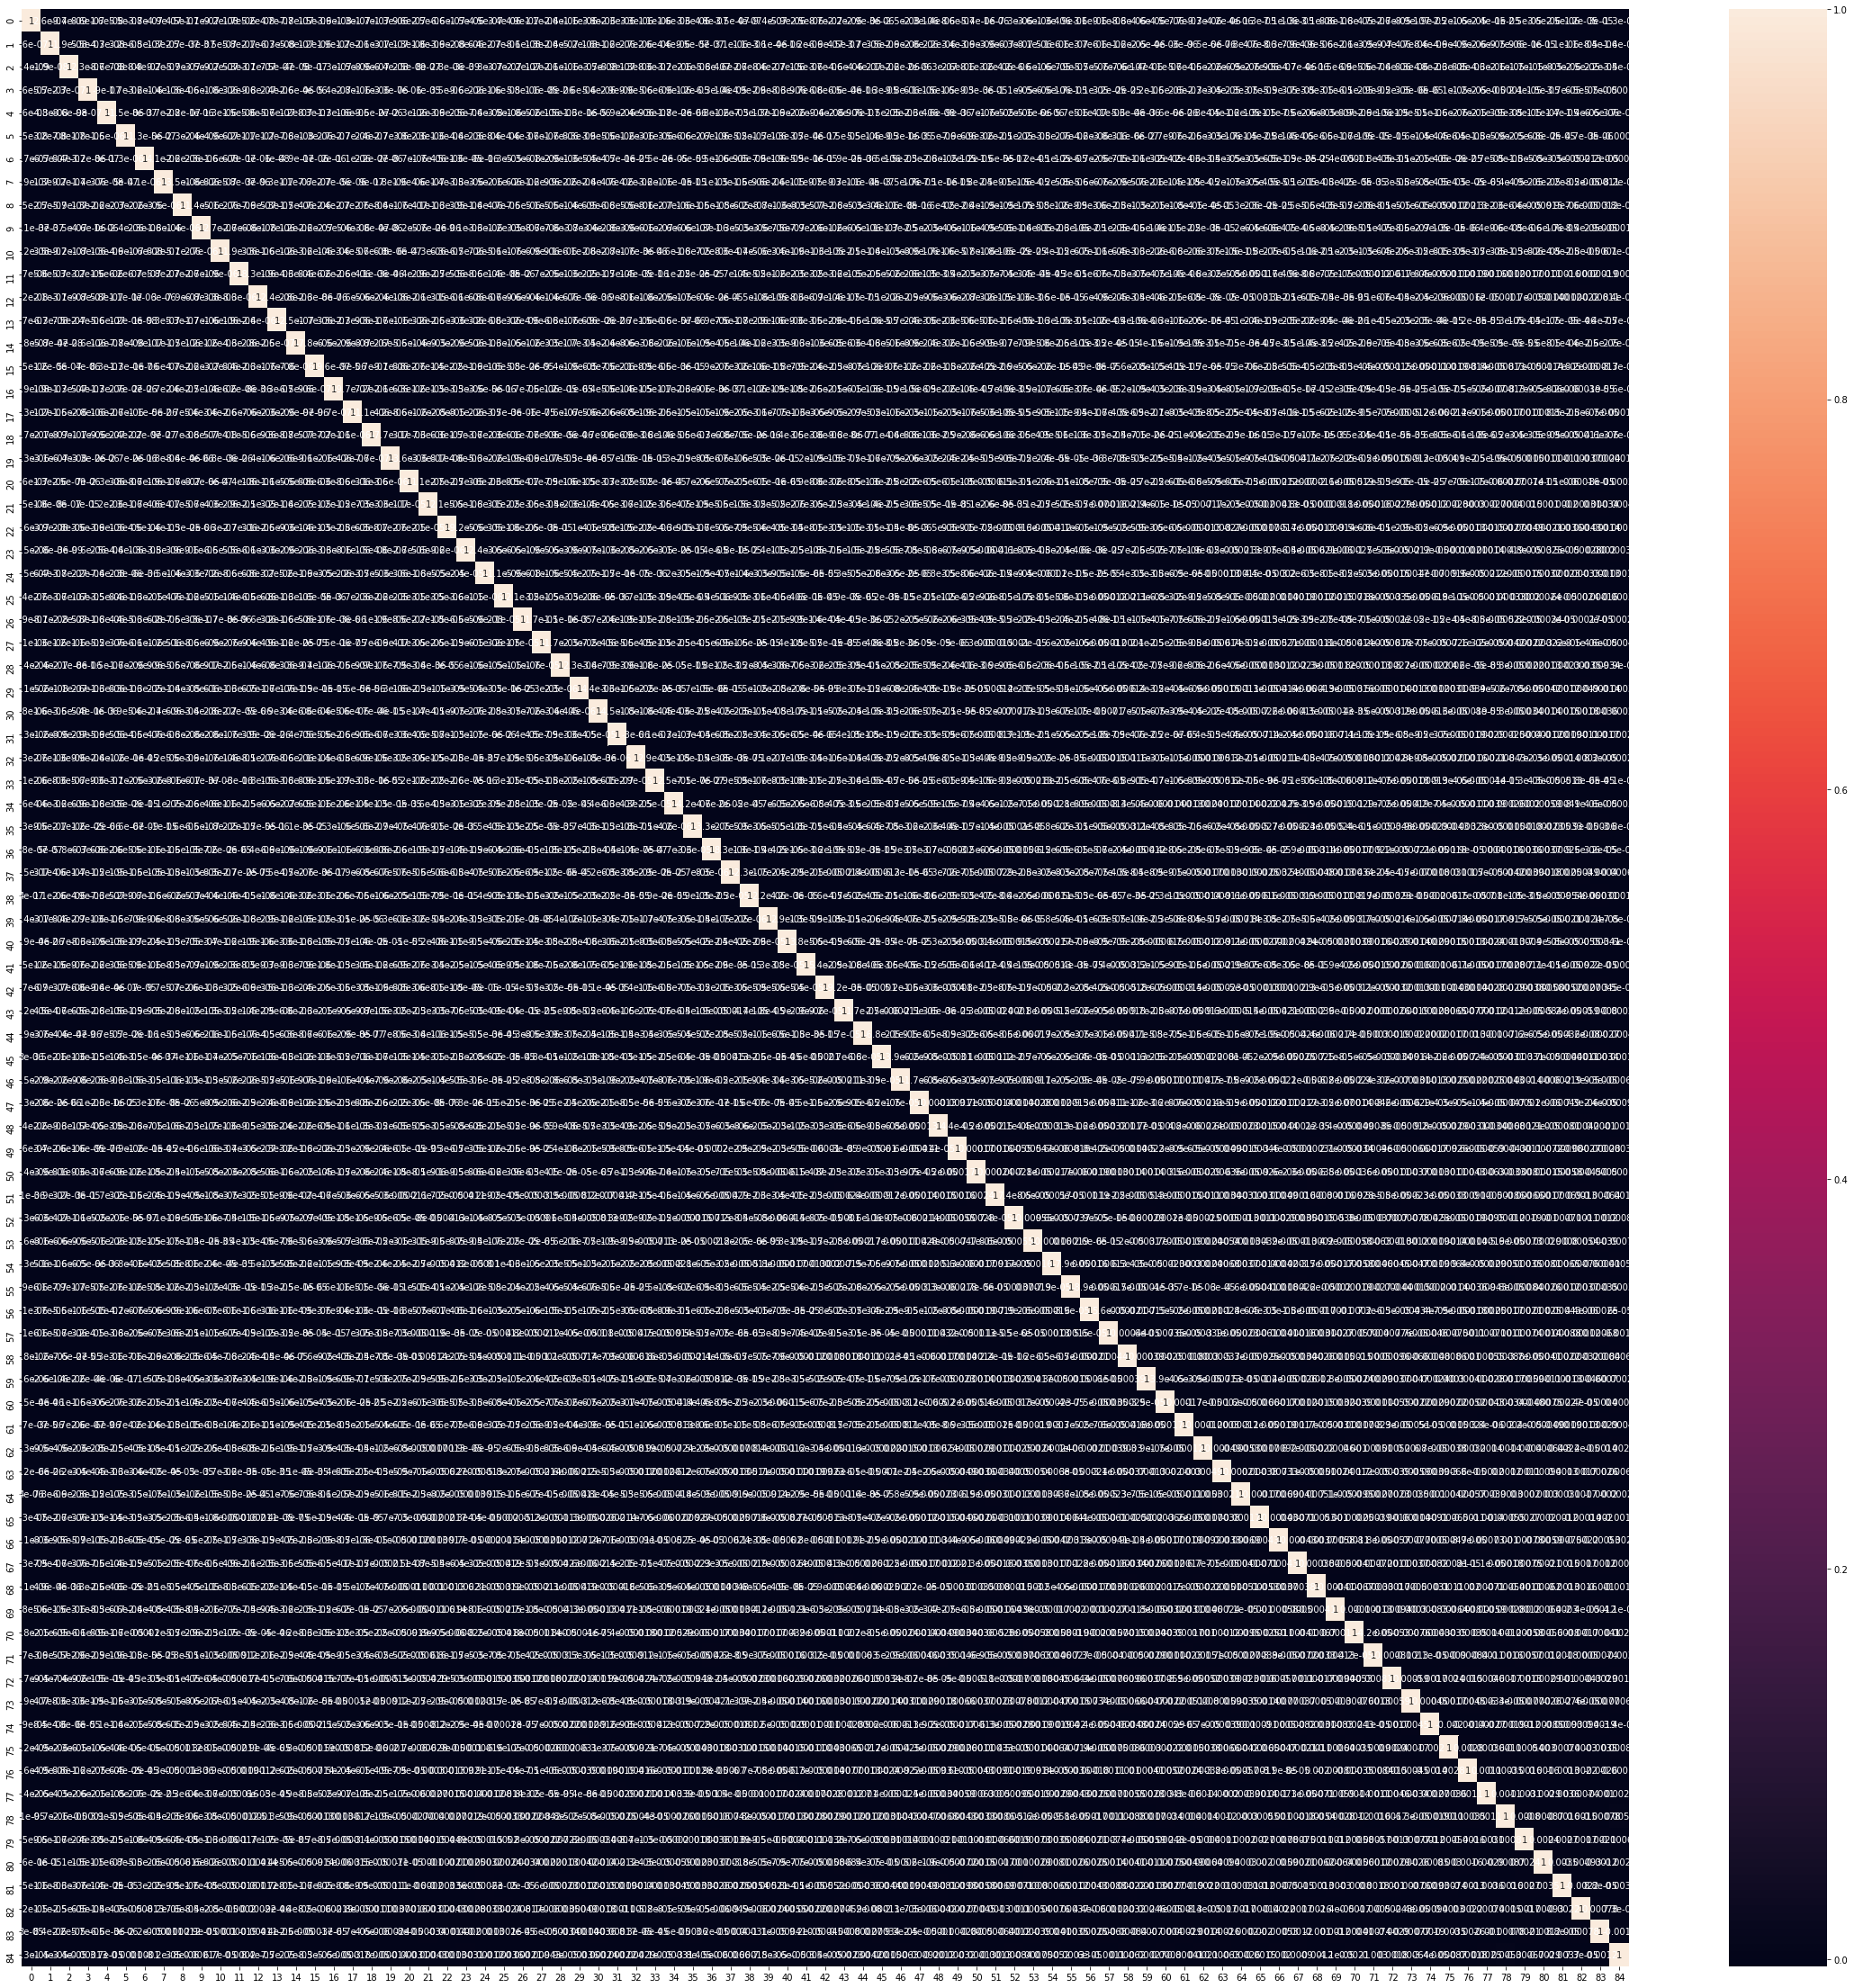

In [65]:
corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=(40, 40))
sns.heatmap(corrmat, annot=True)

#### There is no co-relation b/w the variables:

#### Transform the test data:

In [66]:
pca_test_data = pca_final.transform(x_test)


In [67]:
pca_test_data.shape

(8055, 85)

## Logistic regression:

In [68]:
logistic_regression = LogisticRegression()
logistic_model = logistic_regression.fit(df_train_pca, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
predicted_proba = logistic_model.predict_proba(pca_test_data)[:, 1]

In [70]:
"{:2.2}".format(metrics.roc_auc_score(y_test, predicted_proba))

'0.9'

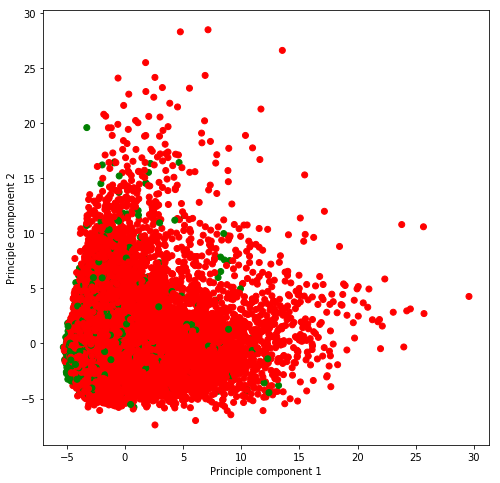

In [71]:
plt.figure(figsize=(8, 8))
plt.scatter(df_train_pca[:, 0], df_train_pca[:, 1], c= y_train['churn'].map({0: 'red', 1: 'green'}))
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')

plt.show()

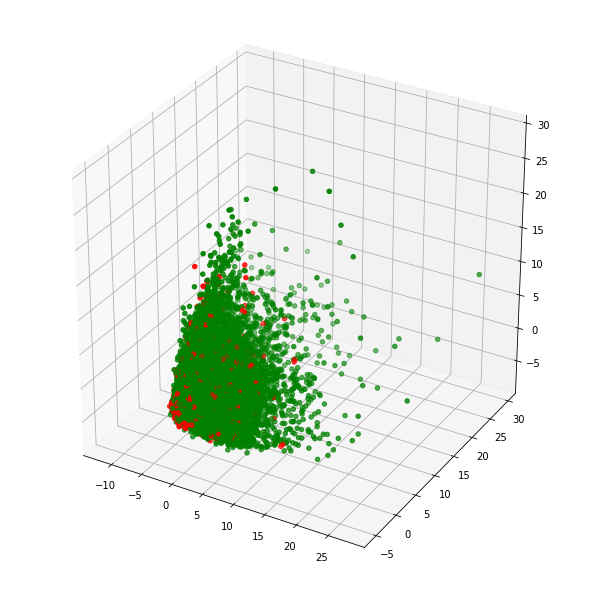

In [72]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
ax.scatter(df_train_pca[:,2], df_train_pca[:,0], df_train_pca[:,1], c=y_train['churn'].map({0:'green',1:'red'}))

In [73]:
len(logistic_model.coef_[0])

85

In [74]:
len(colnames)

135

In [75]:
pca_column_frame = pcs_df.head(85)
pca_column_frame.head()

,PC1,PC2,Feature
0,0.004533,0.030747,loc_og_t2c_mou_8
1,-0.035142,0.235358,std_og_mou_8
2,0.026628,0.008528,ic_others_8
3,0.106856,-0.044750,loc_ic_t2f_mou_8
4,0.027057,-0.002608,isd_ic_mou_8


In [76]:
# result =  pd.DataFrame({'columns': colnames})
pca_column_frame['coeff'] = logistic_model.coef_[0]
pca_column_frame.sort_values(by=['coeff'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PC1,PC2,Feature,coeff
30,0.041761,3.649647e-02,std_ic_t2m_mou_6,-0.782220
29,0.039028,-1.974571e-02,std_og_t2f_mou_6,-0.599085
0,0.004533,3.074748e-02,loc_og_t2c_mou_8,-0.480745
51,0.188220,-1.723411e-03,loc_og_mou_6,-0.464636
5,0.209351,-3.696412e-02,loc_ic_mou_8,-0.293447
24,0.187115,-3.292235e-02,loc_ic_t2m_mou_8,-0.251474
79,0.182170,5.298708e-03,loc_og_t2m_mou_7,-0.245220
47,0.019492,1.230937e-03,ic_others_6,-0.243545
2,0.026628,8.528105e-03,ic_others_8,-0.185498
37,-0.057743,2.203243e-01,std_og_mou_6,-0.151792


## Random forest classifier:

In [77]:
rfc = RandomForestClassifier(n_jobs=-1, bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=8,
                             n_estimators=60)
rfc.fit(df_train_pca,y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [78]:
predictions = rfc.predict(pca_test_data)

In [80]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      7421
         1.0       0.00      0.00      0.00       634

    accuracy                           0.92      8055
   macro avg       0.46      0.50      0.48      8055
weighted avg       0.85      0.92      0.88      8055



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [81]:
accuracy_score(y_true=y_test, y_pred=predictions).round(2)

0.92

In [82]:
print(confusion_matrix(y_test, predictions))

[[7421    0]
 [ 634    0]]


In [83]:
predictions[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [84]:
y_test.head(10)

,churn
26076,0.0
6604,0.0
16831,0.0
20274,1.0
285,0.0
27193,0.0
1638,0.0
9114,0.0
8583,0.0
12057,0.0


In [85]:
predicted_proba[:10].round(3)

array([0.004, 0.095, 0.005, 0.723, 0.069, 0.175, 0.031, 0.072, 0.038,
       0.014])

In [86]:
y_test.head(10)

,churn
26076,0.0
6604,0.0
16831,0.0
20274,1.0
285,0.0
27193,0.0
1638,0.0
9114,0.0
8583,0.0
12057,0.0


In [87]:
print(confusion_matrix(y_test, predictions))

[[7421    0]
 [ 634    0]]


In [88]:
metrics.roc_auc_score(y_test, predicted_proba)

0.897042538928448

### Sampling :

In [89]:
import imblearn

In [90]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
x_rus, y_run, ind = rus.fit_sample(x_train, y_train)

In [91]:
x_rus.shape

(2936, 135)

In [92]:
y_run.sum()

1468.0

Note: There may be a chance of loosing the data with under sampling

### Over sampling: 

In [93]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(return_indices=True)

# x_ros, y_ros, ind = ros.fit_sample(x_train, y_train)
# x_test_ros, y_test_ros, ind = ros.fit_sample(x_test, y_test)

x_ros, y_ros, ind = ros.fit_sample(df_train_pca, y_train)
x_test_ros, y_test_ros, ind = ros.fit_sample(pca_test_data, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
x_ros.shape

(34648, 85)

In [95]:
y_ros.sum()

17324.0

In [96]:
def fit_random_forest(x_train_data, x_test_data, y_train_data, y_test_data):
    rf = RandomForestClassifier(n_jobs=-1,
                                bootstrap=True,
                                max_depth=4,
                                min_samples_leaf=50,
                                min_samples_split=50,
                                n_estimators=60)
    rf.fit(x_train_data, y_train_data)
    predictions = rf.predict(x_test_data)
    print(classification_report(y_test_data, predictions))
    print(accuracy_score(y_true=y_test_data, y_pred=predictions))
    print(confusion_matrix(y_test_data, predictions))
    return rf

In [97]:
rfe_algo = fit_random_forest(x_ros, x_test_ros, y_ros, y_test_ros)

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80      7421
         1.0       0.82      0.75      0.78      7421

    accuracy                           0.79     14842
   macro avg       0.80      0.79      0.79     14842
weighted avg       0.80      0.79      0.79     14842

0.7941652068454386
[[6244 1177]
 [1878 5543]]


### Oversampling followed by under sampling:

In [98]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(ratio='auto')
x_smt_train, y_smt_train = smt.fit_sample(df_train_pca, y_train)
x_smt_test, y_smt_test = smt.fit_sample(pca_test_data, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [99]:
rfe_algo = fit_random_forest(x_smt_train, x_smt_test, y_smt_train, y_smt_test)

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84      7419
         1.0       0.85      0.82      0.83      7419

    accuracy                           0.84     14838
   macro avg       0.84      0.84      0.84     14838
weighted avg       0.84      0.84      0.84     14838

0.8350855910500068
[[6313 1106]
 [1341 6078]]


In [100]:
rfe_algo.feature_importances_.round(3)

array([0.158, 0.005, 0.007, 0.031, 0.001, 0.055, 0.281, 0.012, 0.006,
       0.019, 0.005, 0.017, 0.019, 0.   , 0.009, 0.015, 0.001, 0.104,
       0.019, 0.012, 0.002, 0.001, 0.039, 0.016, 0.012, 0.   , 0.003,
       0.   , 0.002, 0.004, 0.034, 0.011, 0.002, 0.001, 0.002, 0.002,
       0.001, 0.01 , 0.   , 0.001, 0.001, 0.001, 0.   , 0.   , 0.004,
       0.   , 0.   , 0.005, 0.   , 0.001, 0.   , 0.021, 0.   , 0.001,
       0.   , 0.   , 0.   , 0.006, 0.001, 0.   , 0.   , 0.019, 0.   ,
       0.   , 0.   , 0.002, 0.   , 0.001, 0.002, 0.001, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.004, 0.003, 0.   , 0.   , 0.   ,
       0.   , 0.002, 0.   , 0.   ])

### Over sampling with under sampling with logistic regression: 

In [101]:
def fit_logistic_regression(x_train_data, x_test_data, y_train_data, y_test_data):
    log = LogisticRegression(random_state=True)
    log.fit(x_train_data, y_train_data)
    predicted_proba = log.predict_proba(x_test_data)[:,1]
    print(metrics.roc_auc_score(y_test_data, predicted_proba).round(3)*100)
    return log

In [102]:
log_alg = fit_logistic_regression(x_smt_train, x_smt_test, y_smt_train, y_smt_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


91.60000000000001


In [103]:
_percentage = log_alg.predict_proba(x_smt_train)[:,1]

In [104]:
churn_predicted = pd.DataFrame({})
churn_predicted['ChurnProbability'] = _percentage
churn_predicted['y_train'] = y_smt_train
churn_predicted.head(10)

,ChurnProbability,y_train
0,0.132166,0.0
1,0.074572,0.0
2,0.001103,0.0
3,0.024512,0.0
4,0.668567,0.0
5,0.339280,0.0
6,0.428722,0.0
7,0.158427,0.0
8,0.002211,0.0
9,0.006824,0.0


In [105]:
log_alg.classes_

array([0., 1.])

In [106]:
probabilities = [i/10 for i in range(10) ]
cutoff = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])
for _prob in probabilities:
    churn_predicted[_prob] = churn_predicted.ChurnProbability.map(lambda x: 1 if x > _prob else 0)
    cm = metrics.confusion_matrix(churn_predicted.y_train, churn_predicted[_prob])
    print(cm)
    total = sum(sum(cm))
    _accuracy = round((cm[0, 0] + cm[1, 1])/total, 3)
    _sensitivity = round(cm[1,1] / (cm[1,0] + cm[1,1]), 3)
    _specificity = round(cm[0,0] / (cm[0,0] + cm[0,1]), 3)
    cutoff.loc[_prob] = [ _prob, _accuracy, _sensitivity,  _specificity ]
    
cutoff

[[    0 17322]
 [    0 17322]]
[[ 8343  8979]
 [  393 16929]]
[[10736  6586]
 [  754 16568]]
[[12413  4909]
 [ 1131 16191]]
[[13634  3688]
 [ 1575 15747]]
[[14560  2762]
 [ 2069 15253]]
[[15341  1981]
 [ 2771 14551]]
[[15918  1404]
 [ 3757 13565]]
[[16360   962]
 [ 6086 11236]]
[[16860   462]
 [11622  5700]]


,prob,accuracy,sensitivity,specificity
0.0,0.0,0.500,1.000,0.000
0.1,0.1,0.729,0.977,0.482
0.2,0.2,0.788,0.956,0.620
0.3,0.3,0.826,0.935,0.717
0.4,0.4,0.848,0.909,0.787
0.5,0.5,0.861,0.881,0.841
0.6,0.6,0.863,0.840,0.886
0.7,0.7,0.851,0.783,0.919
0.8,0.8,0.797,0.649,0.944
0.9,0.9,0.651,0.329,0.973


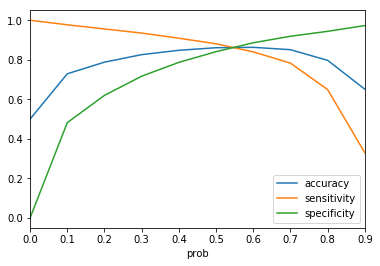

In [107]:
cutoff.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])

In [108]:
_percentage

array([0.13216635, 0.07457155, 0.00110317, ..., 0.38702218, 0.75896354,
       0.98718168])

In [109]:
_test_percentage = log_alg.predict_proba(x_smt_test)[:,1]
test_churn_predicted = pd.DataFrame({'ChurnProbability': log_alg.predict_proba(x_smt_test)[:,1]})
test_churn_predicted['y_test'] = y_smt_test
test_churn_predicted['0.55_predict'] = test_churn_predicted.ChurnProbability.map(lambda x: 1 if x > 0.55 else 0)
test_churn_predicted['0.65_predict'] = test_churn_predicted.ChurnProbability.map(lambda x: 1 if x > 0.65 else 0)
test_churn_predicted['0.60_predict'] = test_churn_predicted.ChurnProbability.map(lambda x: 1 if x > 0.6 else 0)
test_churn_predicted.head(10)

,ChurnProbability,y_test,0.55_predict,0.65_predict,0.60_predict
0,0.018753,0.0,0,0,0
1,0.578896,0.0,1,0,0
2,0.066513,0.0,0,0,0
3,0.970719,1.0,1,1,1
4,0.490309,0.0,0,0,0
5,0.750332,0.0,1,1,1
6,0.170097,0.0,0,0,0
7,0.416578,0.0,0,0,0
8,0.316642,0.0,0,0,0
9,0.109079,0.0,0,0,0


In [110]:
cm = metrics.confusion_matrix(test_churn_predicted.y_test, test_churn_predicted['0.65_predict'])
cm

array([[6714,  705],
       [1603, 5816]])

In [111]:
cm = metrics.confusion_matrix(test_churn_predicted.y_test, test_churn_predicted['0.60_predict'])
cm

array([[6586,  833],
       [1359, 6060]])

In [112]:
cm = metrics.confusion_matrix(test_churn_predicted.y_test, test_churn_predicted['0.55_predict'])
cm

array([[6436,  983],
       [1170, 6249]])

##### **Has an accuracy of 91.5**

In [113]:
_percentage = log_alg.predict_proba(x_smt_test)[:,1]

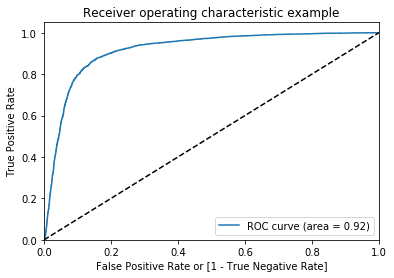

In [115]:
def draw_roc(actual, probability):
    fpr, tpr, thershoulds = metrics.roc_curve(actual, probability, drop_intermediate=False)
    auc = metrics.roc_auc_score(actual, probability)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

draw_roc(y_smt_test, _percentage)


In [116]:
log_alg.coef_.round(2)

array([[-0.48,  0.03, -0.22,  0.08,  0.02, -0.37,  0.63, -0.04, -0.08,
        -0.13, -0.1 ,  0.07,  0.12, -0.07,  0.01, -0.01,  0.13,  0.73,
        -0.07, -0.11, -0.08, -0.01,  0.13,  0.2 , -0.25, -0.15,  0.19,
         0.26,  0.17, -0.74, -0.79,  0.44,  0.03,  0.  , -0.09, -0.06,
        -0.03, -0.35,  0.21, -0.11,  0.01,  0.17,  0.32,  0.2 , -0.09,
         0.08, -0.04, -0.27,  0.04, -0.06, -0.17, -0.53,  0.1 ,  0.04,
         0.01,  0.32, -0.06,  0.15, -0.  , -0.11,  0.01,  0.12,  0.26,
        -0.09, -0.02,  0.13, -0.1 ,  0.04, -0.06, -0.05,  0.16,  0.05,
         0.17,  0.16,  0.03,  0.06,  0.35,  0.56, -0.08, -0.29,  0.22,
        -0.05,  0.13,  0.15, -0.3 ]])

In [117]:
pca_column_frame['sampling_coeff'] = log_alg.coef_[0]
pca_column_frame.iloc[(-np.abs(pca_column_frame['sampling_coeff'].values)).argsort()]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PC1,PC2,Feature,coeff,sampling_coeff
30,0.041761,3.649647e-02,std_ic_t2m_mou_6,-0.782220,-0.791922
29,0.039028,-1.974571e-02,std_og_t2f_mou_6,-0.599085,-0.741013
17,-0.004761,2.705339e-02,roam_og_mou_8,0.589764,0.727567
6,0.057582,-2.240467e-02,std_ic_t2f_mou_8,0.567939,0.632519
77,0.102922,-3.972425e-02,loc_og_t2f_mou_7,0.422791,0.559758
51,0.188220,-1.723411e-03,loc_og_mou_6,-0.464636,-0.526990
0,0.004533,3.074748e-02,loc_og_t2c_mou_8,-0.480745,-0.482160
31,-0.004310,4.000606e-02,og_others_6,0.358784,0.444288
5,0.209351,-3.696412e-02,loc_ic_mou_8,-0.293447,-0.365936
76,-0.023754,1.797390e-01,std_og_t2m_mou_7,0.270867,0.351025


### Random Forest:

In [383]:
# x_smt_train, x_smt_test, y_smt_train, y_smt_test

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(x_smt_train, y_smt_train)

# Make predictions
prediction_test = model_rf.predict(x_smt_test)

print(classification_report(y_smt_test,prediction_test))
print(confusion_matrix(y_smt_test,prediction_test))


              precision    recall  f1-score   support

           0       0.82      0.87      0.84      7344
           1       0.86      0.80      0.83      7344

   micro avg       0.83      0.83      0.83     14688
   macro avg       0.84      0.83      0.83     14688
weighted avg       0.84      0.83      0.83     14688

[[6360  984]
 [1440 5904]]


In [387]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [421]:
r_model = RandomForestClassifier()
params = {
    'max_features': range(30, 40, 5),
    'n_estimators': [40],
    'min_samples_leaf': range(100, 150, 25),
    'min_samples_split': range(100, 150, 25),
    'max_depth': [7, 8, 9]
}

folds = KFold(n_splits=2, shuffle=True, random_state=101)
grid_cv1 = GridSearchCV(r_model,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=folds,
                        verbose=1,
                        return_train_score=True)
grid_cv1.fit(x_smt_train, y_smt_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  3.6min finished


GridSearchCV(cv=KFold(n_splits=2, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': range(30, 40, 5), 'n_estimators': [40], 'min_samples_leaf': range(100, 150, 25), 'min_samples_split': range(100, 150, 25), 'max_depth': [7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [422]:
results = pd.DataFrame(grid_cv1.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,12.859880,0.066538,0.159538,0.004977,7,30,100,100,40,"{'max_depth': 7, 'max_features': 30, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 40}",0.841224,0.839009,0.840117,0.001108,11,0.852070,0.852362,0.852216,0.000146
1,12.961638,0.143068,0.162190,0.011098,7,30,100,125,40,"{'max_depth': 7, 'max_features': 30, 'min_samples_leaf': 100, 'min_samples_split': 125, 'n_estimators': 40}",0.842391,0.838017,0.840204,0.002187,10,0.854286,0.851079,0.852682,0.001603
2,14.122897,0.051716,0.095049,0.004973,7,30,125,100,40,"{'max_depth': 7, 'max_features': 30, 'min_samples_leaf': 125, 'min_samples_split': 100, 'n_estimators': 40}",0.836327,0.836268,0.836297,0.000029,23,0.845190,0.847813,0.846501,0.001312
3,14.260468,0.006311,0.104953,0.008859,7,30,125,125,40,"{'max_depth': 7, 'max_features': 30, 'min_samples_leaf': 125, 'min_samples_split': 125, 'n_estimators': 40}",0.838892,0.835802,0.837347,0.001545,19,0.846939,0.846997,0.846968,0.000029
4,20.286649,0.058248,0.093886,0.003867,7,35,100,100,40,"{'max_depth': 7, 'max_features': 35, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 40}",0.843790,0.836735,0.840262,0.003528,9,0.853644,0.852711,0.853178,0.000466
5,20.172500,0.047993,0.106279,0.018757,7,35,100,125,40,"{'max_depth': 7, 'max_features': 35, 'min_samples_leaf': 100, 'min_samples_split': 125, 'n_estimators': 40}",0.842507,0.837609,0.840058,0.002449,12,0.854227,0.850321,0.852274,0.001953
6,17.328426,0.031906,0.105060,0.006907,7,35,125,100,40,"{'max_depth': 7, 'max_features': 35, 'min_samples_leaf': 125, 'min_samples_split': 100, 'n_estimators': 40}",0.839300,0.835743,0.837522,0.001778,18,0.850029,0.847872,0.848950,0.001079
7,17.238429,0.103731,0.109219,0.001317,7,35,125,125,40,"{'max_depth': 7, 'max_features': 35, 'min_samples_leaf': 125, 'min_samples_split': 125, 'n_estimators': 40}",0.838017,0.835452,0.836735,0.001283,21,0.847755,0.847055,0.847405,0.000350
8,15.873871,0.051528,0.109124,0.004095,8,30,100,100,40,"{'max_depth': 8, 'max_features': 30, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 40}",0.844840,0.840175,0.842507,0.002332,6,0.856327,0.854694,0.855510,0.000816
9,16.004102,0.082535,0.107409,0.005691,8,30,100,125,40,"{'max_depth': 8, 'max_features': 30, 'min_samples_leaf': 100, 'min_samples_split': 125, 'n_estimators': 40}",0.846414,0.842857,0.844636,0.001778,1,0.856618,0.858192,0.857405,0.000787


In [423]:
grid_cv1.best_params_

{'max_depth': 8,
 'max_features': 30,
 'min_samples_leaf': 100,
 'min_samples_split': 125,
 'n_estimators': 40}

In [424]:
best_estimator = grid_cv1.best_estimator_

In [425]:
best_estimator.fit(x_smt_train, y_smt_train)

# Make predictions
prediction_test = best_estimator.predict(x_smt_test)

print(classification_report(y_smt_test,prediction_test))
print(confusion_matrix(y_smt_test,prediction_test))


              precision    recall  f1-score   support

           0       0.82      0.87      0.84      7344
           1       0.86      0.81      0.83      7344

   micro avg       0.84      0.84      0.84     14688
   macro avg       0.84      0.84      0.84     14688
weighted avg       0.84      0.84      0.84     14688

[[6380  964]
 [1408 5936]]


In [426]:
best_estimator.feature_importances_.round(3)

array([0.242, 0.01 , 0.007, 0.008, 0.005, 0.003, 0.299, 0.028, 0.002,
       0.003, 0.001, 0.005, 0.004, 0.001, 0.022, 0.004, 0.001, 0.152,
       0.009, 0.008, 0.001, 0.002, 0.002, 0.012, 0.001, 0.001, 0.002,
       0.002, 0.001, 0.001, 0.009, 0.001, 0.004, 0.001, 0.002, 0.002,
       0.002, 0.003, 0.003, 0.005, 0.002, 0.005, 0.002, 0.001, 0.001,
       0.001, 0.001, 0.003, 0.002, 0.001, 0.001, 0.002, 0.02 , 0.011,
       0.001, 0.004, 0.002, 0.001, 0.002, 0.001, 0.003, 0.023, 0.   ,
       0.004, 0.001, 0.003, 0.001, 0.001, 0.001, 0.   , 0.001, 0.   ,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.005, 0.007, 0.001, 0.001,
       0.001, 0.007, 0.001, 0.   ])

In [428]:
best_estimator.feature_importances_.shape

(85,)